In [3]:
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.8 MB/s eta 0:00:0031m13.8 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release 

### インポート

In [7]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

### データ読み込み

In [9]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
store = pd.read_csv("./data/store.csv")

/var/folders/3f/8qzz5qyj3n52d_mf54xxgdr00000gn/T/ipykernel_44558/2849102267.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./data/train.csv")


In [10]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
train.info()
print("----------------------")
test.info()
print("----------------------")
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null 

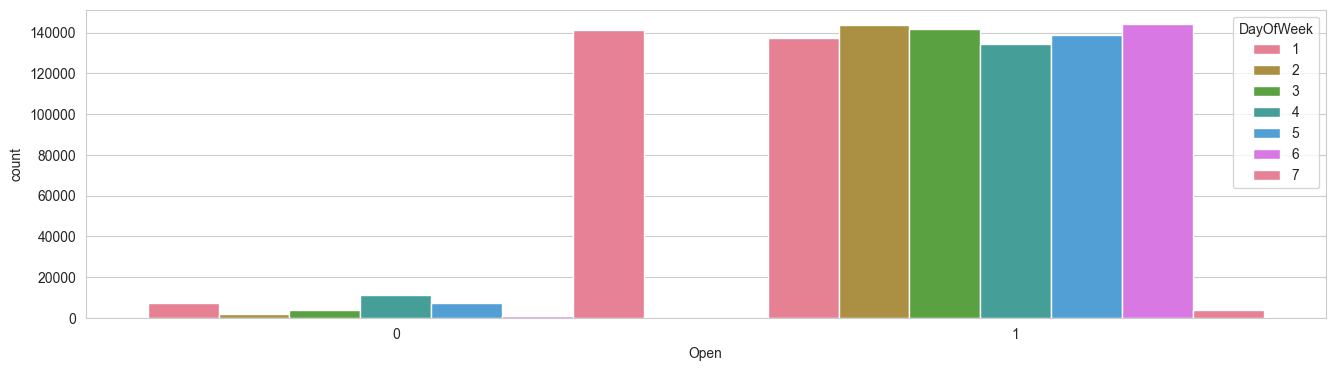

In [ ]:
# Openを見る

fig,axis1 = plt.subplots(figsize=(16,4))
sns.countplot(x="Open",hue="DayOfWeek",data=train,palette="husl",ax=axis1)

# NaN値を埋める(Open が欠損なら、平日相当=1、日曜=0 を入れる)
# 右辺 (test["DayOfWeek"] != 7).astype(int) は、日曜=7なら0、それ以外は1。
test.loc[test["Open"].isnull(),"Open"] = (test["DayOfWeek"] != 7).astype(int)

In [15]:
# Dateを見る

# 年と月の列を作る
train["Year"] = train["Date"].apply(lambda x : int(str(x)[:4]))
train["Month"] = train["Date"].apply(lambda x : int(str(x)[5:7]))

test["Year"] = test["Date"].apply(lambda x : int(str(x)[:4]))
test["Month"] = test["Date"].apply(lambda x : int(str(x)[5:7]))

# 年月日を年月に入れ替える
train["Date"] = train["Date"].apply(lambda x : (str(x)[:7]))
test["Date"] = test["Date"].apply(lambda x : (str(x)[:7]))

# Dateでグルーピングして、平均売上とそのパーセンテージを取得する
average_sales = train.groupby("Date")["Sales"].mean()
pct_change_sales = train.groupby("Date")["Sales"].sum().pct_change()

[Text(0, 0, '2013-01'),
 Text(1, 0, '2013-02'),
 Text(2, 0, '2013-03'),
 Text(3, 0, '2013-04'),
 Text(4, 0, '2013-05'),
 Text(5, 0, '2013-06'),
 Text(6, 0, '2013-07'),
 Text(7, 0, '2013-08'),
 Text(8, 0, '2013-09'),
 Text(9, 0, '2013-10'),
 Text(10, 0, '2013-11'),
 Text(11, 0, '2013-12'),
 Text(12, 0, '2014-01'),
 Text(13, 0, '2014-02'),
 Text(14, 0, '2014-03'),
 Text(15, 0, '2014-04'),
 Text(16, 0, '2014-05'),
 Text(17, 0, '2014-06'),
 Text(18, 0, '2014-07'),
 Text(19, 0, '2014-08'),
 Text(20, 0, '2014-09'),
 Text(21, 0, '2014-10'),
 Text(22, 0, '2014-11'),
 Text(23, 0, '2014-12'),
 Text(24, 0, '2015-01'),
 Text(25, 0, '2015-02'),
 Text(26, 0, '2015-03'),
 Text(27, 0, '2015-04'),
 Text(28, 0, '2015-05'),
 Text(29, 0, '2015-06'),
 Text(30, 0, '2015-07')]

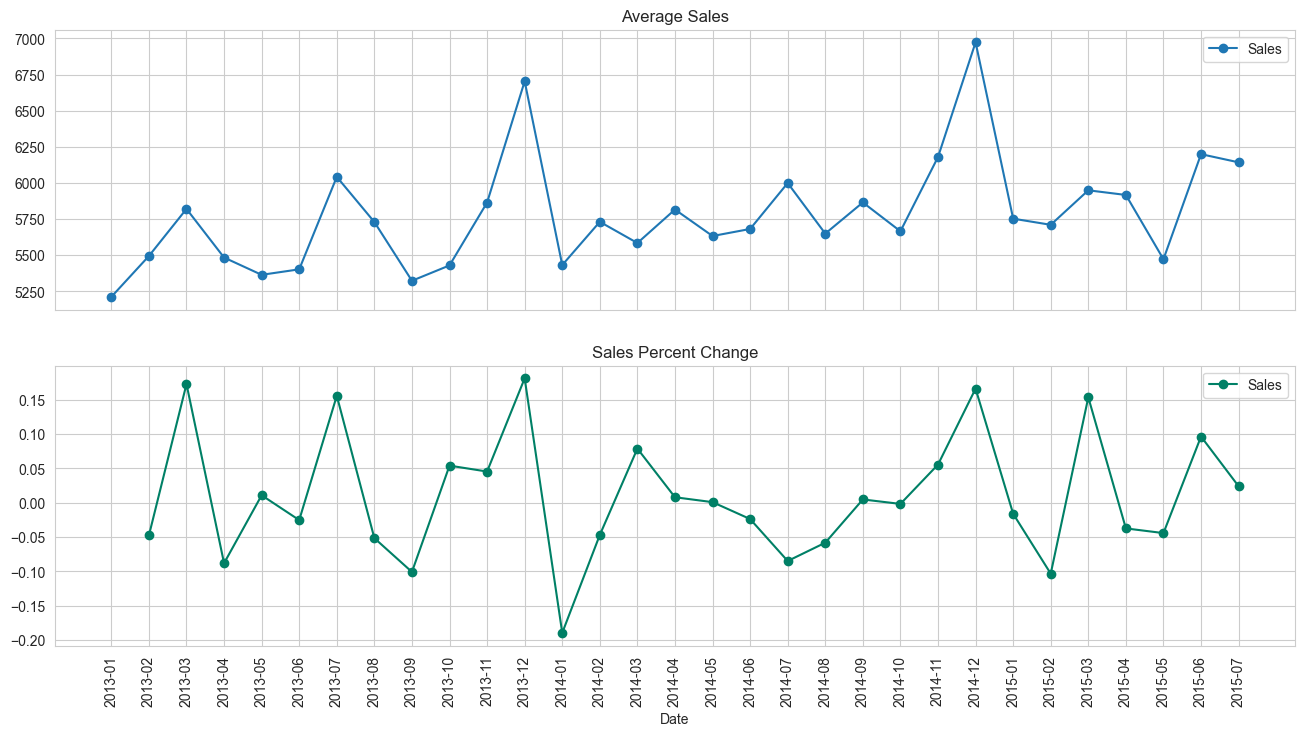

In [ ]:
fig,(axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(16,8))

# 時系列の売上平均をプロットする
ax1 = average_sales.plot(legend=True,ax=axis1,marker="o",title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.to_list(),rotation=90)

# 時系列の売上平均前日比(%)をプロットする
ax2 =pct_change_sales.plot(legend=True,ax=axis2,marker="o",rot=90,colormap="summer",title="Sales Percent Change")
ax2.set_xticks(range(len(pct_change_sales)))
ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)